matala 3

id1 = "315022103'
id2 = "316390053"

name_student_1 = "Orel, buchris"
name_student_2 = "Bar, gavriely "


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv"
youtube_df = pd.read_csv(url)

In [4]:
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


solution to question 1:we chose the maximum value

In [5]:
views_max = youtube_df['views'].max()
views_max

149376127

In [6]:
name_max = youtube_df.loc[youtube_df['views']==views_max]
name_max[['title','views','publish_time']]

,title,views,publish_time
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,2017-12-06T17:58:51.000Z


solution to question 2:we showed the views for the most popular channels

In [7]:
channel_title = youtube_df.groupby('channel_title')[['views']].sum()
channel_title.sort_values('views',ascending=False).head(3)

,views
channel_title,
YouTube Spotlight,783298628
Marvel Entertainment,679590872
LuisFonsiVEVO,534738794


solution to question 3+4:we used the "spearman correlation" and used a heatmap to show how each value interacts with another


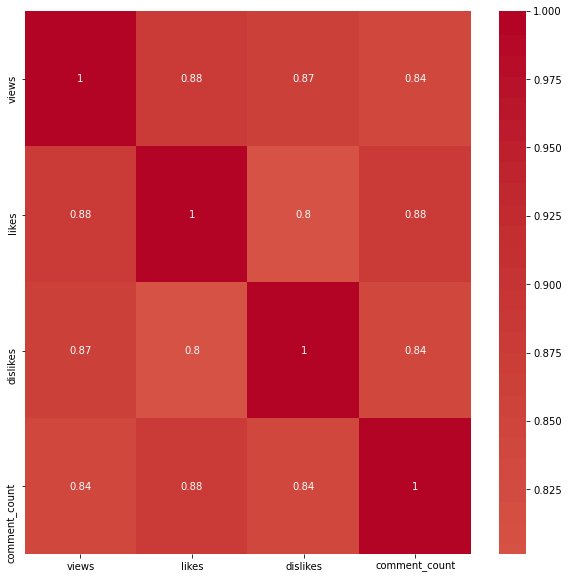

In [8]:
corrs = youtube_df.drop(columns=['category_id','comments_disabled','ratings_disabled','video_error_or_removed']).corr(method = 'spearman')
plt.figure(figsize=(10,10)) 
sns.heatmap(corrs,  cmap='coolwarm', center =0,annot = True); 

solution to question 5:the two highest values were between "views" and "likes" and between "likes" and "comment count" we showed each of them in a scatter plot and got reasonable results which led us to keep them without a change from the base form


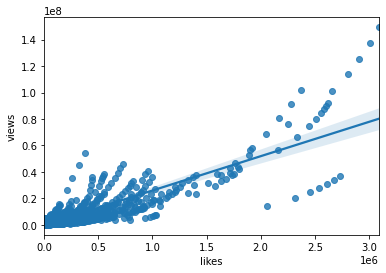

In [9]:
sns.regplot(x='likes', y='views', data=youtube_df);

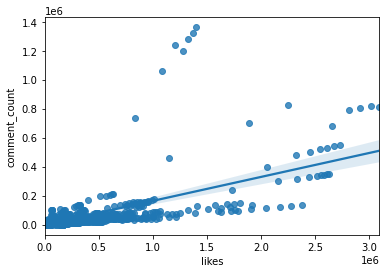

In [10]:
sns.regplot(x='likes', y='comment_count', data=youtube_df);

solution to question 6:we converted the publish time collum data type to pandas date time later we extracted the year into a new year collum we chose we created a new data frame containing only data from 2017 and 2018 and used that data to show how many views were per category for those periods of time


In [45]:
youtube_df['publish_time']=pd.to_datetime(youtube_df.publish_time)
youtube_df['year']=pd.DatetimeIndex(youtube_df.publish_time).year
Saif6=youtube_df[youtube_df.year >= 2017]
Saif6.groupby('category_id')[['views']].sum()

,views
category_id,
1,1009534450
2,86900867
10,5344552275
15,176875195
17,442903515
19,61874890
20,134531087
22,769675204
23,1327929119
